In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
############# constants ############################
G = 6.67 * 10**(-8)        ## [cm^3 / (g * s^2)]
c = 3 * 10**10             ## [cm/s]
M_sun = 1.989 * 10**33     ## [g]

In [4]:
############# MESA OUTPUT ##########################
file = "C:/Users/Louis/OneDrive/Documenten/exercise/LOGS_16Msun/history.data"
matrix = np.genfromtxt(file, skip_header=5, names=True)
Mass_List = matrix["star_mass"]

In [5]:
############# masses [g] #################################
M_init = 16 * M_sun
M_final = Mass_List[136] 
M_co = 5 * M_sun

def mass_ratio(m1, m2):
    return m1/m2;

In [6]:
############ orbital period [days] and separation [cm] ###
P_init = 10

def orbital_period(m1, m2, m3):
    return P_init * ( (mass_ratio(m1, m3)+1)/(mass_ratio(m2, m3)+1) )**2;

def orbital_separation(m1,m2,m3):
    return np.cbrt( ( G * (m2 + m3) * (orbital_period(m1,m2,m3)*24*60*60)**2 ) / ( 4 * np.pi**2) );

In [7]:
########### merging time [years] #########################
def B(m1,m2):
    return  (64 * G**3 * (m1 + m2) * m1 * m2) / (5 * c**5) ;

def merging_time(m1,m2,m3):
    return ( orbital_separation(m1,m2,m3)**4 ) / ( 4 * B(m2,m3) );

In [8]:
##########################################################

In [9]:
P = orbital_period(M_init, M_final, M_co)
a = orbital_separation(M_init, M_final, M_co)
t = merging_time(M_init, M_final, M_co)

In [10]:
P,a,t

(176.39999999999992, 15744607689614.34, 1.6457397050911241e+56)

In [11]:
#########################################################

C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel packag

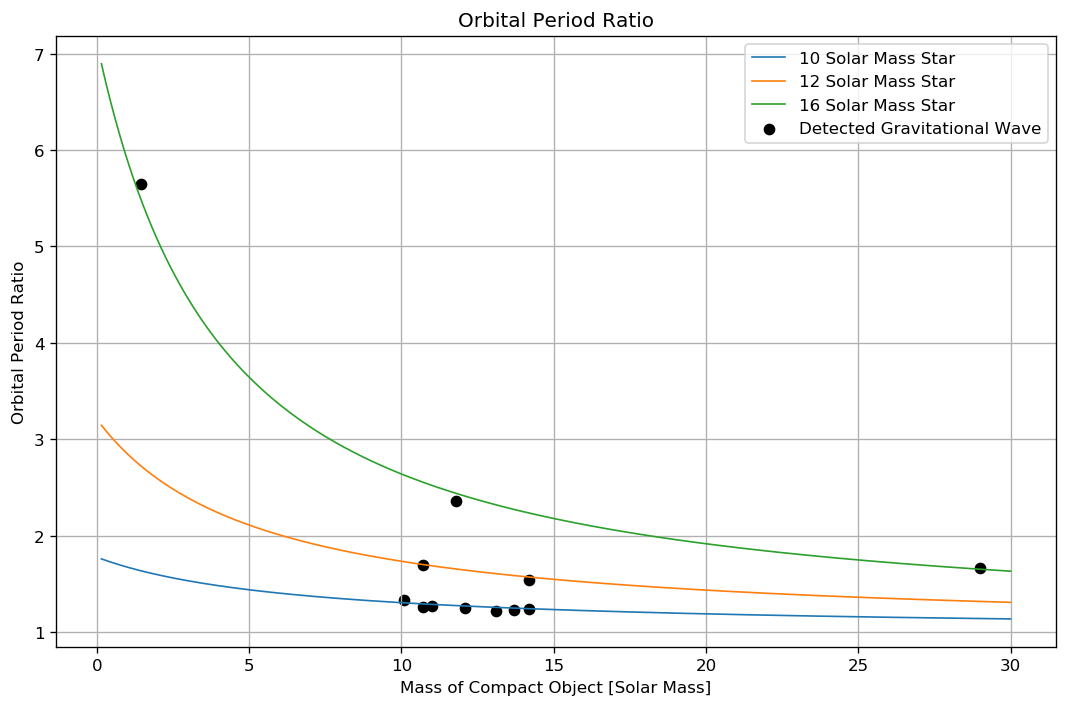

In [117]:
## plotting #############################################
def ratio(M_initial, M_stripped, M_compactObject):
    return ( ( 1 + (M_initial/M_compactObject) ) / ( 1 + (M_stripped/M_compactObject) ) )**2;

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(9,6))

compact_objects = np.linspace(start=0, stop=30, num=200)

ax.plot(compact_objects , ratio(10, 7.5, compact_objects), label = '10 Solar Mass Star', linewidth = 1)
ax.plot(compact_objects , ratio(12, 6.7, compact_objects), label = '12 Solar Mass Star', linewidth = 1)
ax.plot(compact_objects , ratio(16, 6, compact_objects), label = '16 Solar Mass Star', linewidth = 1)

################################################################################################################################

initial_co_10 = [10, 10, 10, 10, 10, 10, 10]
detected_co_10 = [7.3, 7.5, 7.6, 7.7, 7.7, 7.7, 7.8]
detected_companions_10 = [10.1, 14.2, 11.0, 13.7, 10.7, 12.1, 13.1]

initial_co_12 = [12, 12]
detected_co_12 = [6.7, 6.9]
detected_companions_12 = [10.7, 14.2]

initial_co_16 = [16, 16, 16]
detected_co_16 = [5.9, 5.9, 6.3]
detected_companions_16 = [29, 1.44, 11.8]


ratio_list = []
detected_companions = []
for i in range(len(initial_co_10)):
    ratio_list.append(ratio(initial_co_10[i], detected_co_10[i], detected_companions_10[i]))
    detected_companions.append(detected_companions_10[i])
for i in range(len(initial_co_12)):
    ratio_list.append(ratio(initial_co_12[i], detected_co_12[i], detected_companions_12[i]))
    detected_companions.append(detected_companions_12[i])
for i in range(len(initial_co_16)):
    ratio_list.append(ratio(initial_co_16[i], detected_co_16[i], detected_companions_16[i]))
    detected_companions.append(detected_companions_16[i])

## detected_companions_errormin = [1.4, 3.3, 1.7, 3.2, 1.6, 2.3, 2.9, 2.1, 4.0, 14, 0.29, 3.0]  
## detected_companions_errormax = [3.5, 5.6, 5.5, 8.8, 3.7, 4.6, 10.2, 4.1, 8.0, 12, 0.85, 10.1]
## detected_companions_error = [detected_companions_errormin, detected_companions_errormax]    
 
x = detected_companions
y = ratio_list
## x_error = detected_companions_error
    
ax.scatter(x, y, color='black', label= 'Detected Gravitational Wave')

ax.set_ylabel('Orbital Period Ratio')
ax.set_xlabel('Mass of Compact Object [Solar Mass]')
ax.set_title('Orbital Period Ratio')
ax.legend()

plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


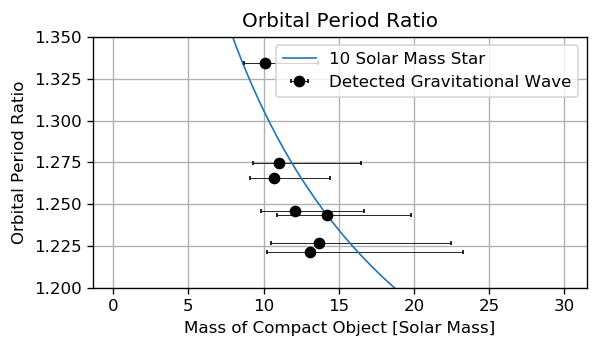

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5,3))

compact_objects = np.linspace(start=0, stop=30, num=200)

ax.plot(compact_objects , ratio(10, 7.5, compact_objects), label = '10 Solar Mass Star', linewidth = 1)

ratio_list = []
detected_companions = []
for i in range(len(initial_co_10)):
    ratio_list.append(ratio(initial_co_10[i], detected_co_10[i], detected_companions_10[i]))
    detected_companions.append(detected_companions_10[i])
    
detected_companions_errormin = [1.4, 3.3, 1.7, 3.2, 1.6, 2.3, 2.9] 
detected_companions_errormax = [3.5, 5.6, 5.5, 8.8, 3.7, 4.6, 10.2]
detected_companions_error = [detected_companions_errormin, detected_companions_errormax]    

x = detected_companions
y = ratio_list
x_error = detected_companions_error

ax.errorbar(x, y, xerr = x_error, color='black', label= 'Detected Gravitational Wave', fmt='o', elinewidth=0.5, capsize=1)

ax.set_ylim(1.2, 1.35)

ax.set_ylabel('Orbital Period Ratio')
ax.set_xlabel('Mass of Compact Object [Solar Mass]')
ax.set_title('Orbital Period Ratio')
ax.legend()

plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


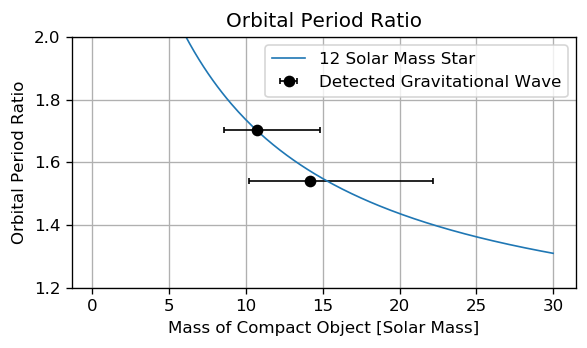

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5,3))

compact_objects = np.linspace(start=0, stop=30, num=200)

ax.plot(compact_objects , ratio(12, 6.7, compact_objects), label = '12 Solar Mass Star', linewidth = 1)

ratio_list = []
detected_companions = []
for i in range(len(initial_co_12)):
    ratio_list.append(ratio(initial_co_12[i], detected_co_12[i], detected_companions_12[i]))
    detected_companions.append(detected_companions_12[i])
    
detected_companions_errormin = [2.1, 4.0] 
detected_companions_errormax = [4.1, 8.0]
detected_companions_error = [detected_companions_errormin, detected_companions_errormax]    

x = detected_companions
y = ratio_list
x_error = detected_companions_error

ax.errorbar(x, y, xerr = x_error, color='black', label= 'Detected Gravitational Wave', fmt='o', elinewidth=1, capsize=2)

ax.set_ylim(1.2, 2)

ax.set_ylabel('Orbital Period Ratio')
ax.set_xlabel('Mass of Compact Object [Solar Mass]')
ax.set_title('Orbital Period Ratio')
ax.legend()

plt.tight_layout()
plt.grid()
plt.show()

C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Louis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


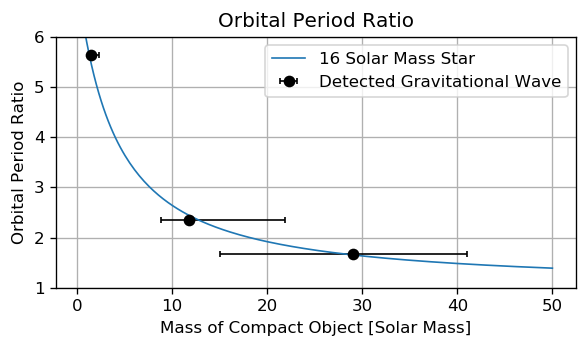

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5,3))

compact_objects = np.linspace(start=0, stop=50, num=200)

ax.plot(compact_objects , ratio(16, 6, compact_objects), label = '16 Solar Mass Star', linewidth = 1)

ratio_list = []
detected_companions = []
for i in range(len(initial_co_16)):
    ratio_list.append(ratio(initial_co_16[i], detected_co_16[i], detected_companions_16[i]))
    detected_companions.append(detected_companions_16[i])
    
detected_companions_errormin = [14, 0.29, 3.0] 
detected_companions_errormax = [12, 0.85, 10.1]
detected_companions_error = [detected_companions_errormin, detected_companions_errormax]    

x = detected_companions
y = ratio_list
x_error = detected_companions_error

ax.errorbar(x, y, xerr = x_error, color='black', label= 'Detected Gravitational Wave', fmt='o', elinewidth=1, capsize=2)

ax.set_ylim(1, 6)

ax.set_ylabel('Orbital Period Ratio')
ax.set_xlabel('Mass of Compact Object [Solar Mass]')
ax.set_title('Orbital Period Ratio')
ax.legend()

plt.tight_layout()
plt.grid()
plt.show()